In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import plotly.express as pl

In [2]:
public_data = pd.read_csv("survey_results_public.csv")
public_data.head(10)

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8
5,6,I am a developer by profession,No,NaN,14,NaN,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,React.js,NaN,NaN,NaN,6,4
6,7,I am a developer by profession,Yes,NaN,18,Monthly,NaN,NaN,India,United States dollar,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,A lot more welcome now than last year,NaN,6,4
7,8,I am a developer by profession,Yes,36.0,12,Yearly,116000.0,116000.0,United States,United States dollar,...,Easy,Appropriate in length,No,"Computer science, computer engineering, or sof...",Django;React.js;Vue.js,Flask,Just as welcome now as I felt last year,39.0,17,13
8,9,I am a developer by profession,No,30.0,20,NaN,NaN,NaN,Tunisia,United States dollar,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",Angular.js,jQuery,Just as welcome now as I felt last year,50.0,6,4
9,10,I am a developer by profession,Yes,22.0,14,Yearly,25000.0,32315.0,United Kingdom,Pound sterling,...,Easy,Appropriate in length,No,Mathematics or statistics,Flask;jQuery,Flask;jQuery,Somewhat more welcome now than last year,36.0,8,4


In [3]:
public_data.columns


Index(['Respondent', 'MainBranch', 'Hobbyist', 'Age', 'Age1stCode', 'CompFreq',
       'CompTotal', 'ConvertedComp', 'Country', 'CurrencyDesc',
       'CurrencySymbol', 'DatabaseDesireNextYear', 'DatabaseWorkedWith',
       'DevType', 'EdLevel', 'Employment', 'Ethnicity', 'Gender', 'JobFactors',
       'JobSat', 'JobSeek', 'LanguageDesireNextYear', 'LanguageWorkedWith',
       'MiscTechDesireNextYear', 'MiscTechWorkedWith',
       'NEWCollabToolsDesireNextYear', 'NEWCollabToolsWorkedWith', 'NEWDevOps',
       'NEWDevOpsImpt', 'NEWEdImpt', 'NEWJobHunt', 'NEWJobHuntResearch',
       'NEWLearn', 'NEWOffTopic', 'NEWOnboardGood', 'NEWOtherComms',
       'NEWOvertime', 'NEWPurchaseResearch', 'NEWPurpleLink', 'NEWSOSites',
       'NEWStuck', 'OpSys', 'OrgSize', 'PlatformDesireNextYear',
       'PlatformWorkedWith', 'PurchaseWhat', 'Sexuality', 'SOAccount',
       'SOComm', 'SOPartFreq', 'SOVisitFreq', 'SurveyEase', 'SurveyLength',
       'Trans', 'UndergradMajor', 'WebframeDesireNextYear',
  

In [4]:
schema_df = pd.read_csv("survey_results_schema.csv", index_col='Column').QuestionText
schema_df.WorkWeekHrs

'On average, how many hours per week do you work? Please enter a whole number in the box.'

In [5]:
selected_columns = [
    'Age','Country','Gender','EdLevel','UndergradMajor',
    'Hobbyist','Age1stCode','YearsCode','YearsCodePro', 'LanguageWorkedWith','LanguageDesireNextYear','NEWLearn','NEWStuck',
    'Employment', 'DevType','WorkWeekHrs','JobSat','JobFactors','NEWOvertime','NEWEdImpt'  
    ]
len(selected_columns)

20

In [6]:
data = public_data[selected_columns].copy()
data.head(3)

,Age,Country,Gender,EdLevel,UndergradMajor,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageWorkedWith,LanguageDesireNextYear,NEWLearn,NEWStuck,Employment,DevType,WorkWeekHrs,JobSat,JobFactors,NEWOvertime,NEWEdImpt
0,NaN,Germany,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,13,36,27,C#;HTML/CSS;JavaScript,C#;HTML/CSS;JavaScript,Once a year,Visit Stack Overflow;Go for a walk or other ph...,"Independent contractor, freelancer, or self-em...","Developer, desktop or enterprise applications;...",50.0,Slightly satisfied,"Languages, frameworks, and other technologies ...",Often: 1-2 days per week or more,Fairly important
1,NaN,United Kingdom,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",No,19,7,4,JavaScript;Swift,Python;Swift,Once a year,Visit Stack Overflow;Go for a walk or other ph...,Employed full-time,"Developer, full-stack;Developer, mobile",NaN,Very dissatisfied,NaN,NaN,Fairly important
2,NaN,Russian Federation,NaN,NaN,NaN,Yes,15,4,NaN,Objective-C;Python;Swift,Objective-C;Python;Swift,Once a decade,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
data.LanguageWorkedWith.unique()


array(['C#;HTML/CSS;JavaScript', 'JavaScript;Swift',
       'Objective-C;Python;Swift', ...,
       'Bash/Shell/PowerShell;C;C++;Go;HTML/CSS;JavaScript;Kotlin;Python;Ruby;Rust;SQL',
       'Bash/Shell/PowerShell;C#;C++;HTML/CSS;JavaScript;Kotlin;PHP;SQL;VBA',
       'Bash/Shell/PowerShell;C;C#;C++;HTML/CSS;Java;JavaScript;Objective-C;Python;Swift'],
      dtype=object)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     45446 non-null  float64
 1   Country                 64072 non-null  object 
 2   Gender                  50557 non-null  object 
 3   EdLevel                 57431 non-null  object 
 4   UndergradMajor          50995 non-null  object 
 5   Hobbyist                64416 non-null  object 
 6   Age1stCode              57900 non-null  object 
 7   YearsCode               57684 non-null  object 
 8   YearsCodePro            46349 non-null  object 
 9   LanguageWorkedWith      57378 non-null  object 
 10  LanguageDesireNextYear  54113 non-null  object 
 11  NEWLearn                56156 non-null  object 
 12  NEWStuck                54983 non-null  object 
 13  Employment              63854 non-null  object 
 14  DevType                 49370 non-null

In [9]:
data['Age1stCode'] = pd.to_numeric(data['Age1stCode'], errors='coerce')
data['YearsCode'] = pd.to_numeric(data['YearsCode'], errors='coerce')
data['YearsCodePro'] = pd.to_numeric(data['YearsCodePro'], errors='coerce')

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     45446 non-null  float64
 1   Country                 64072 non-null  object 
 2   Gender                  50557 non-null  object 
 3   EdLevel                 57431 non-null  object 
 4   UndergradMajor          50995 non-null  object 
 5   Hobbyist                64416 non-null  object 
 6   Age1stCode              57473 non-null  float64
 7   YearsCode               56784 non-null  float64
 8   YearsCodePro            44133 non-null  float64
 9   LanguageWorkedWith      57378 non-null  object 
 10  LanguageDesireNextYear  54113 non-null  object 
 11  NEWLearn                56156 non-null  object 
 12  NEWStuck                54983 non-null  object 
 13  Employment              63854 non-null  object 
 14  DevType                 49370 non-null

In [11]:
#Possivelmente tenha ahavido erro de digitação e com isso temos valores na coluna idade como '1' e '279'
data.describe()

,Age,Age1stCode,YearsCode,YearsCodePro,WorkWeekHrs
count,45446.000000,57473.000000,56784.000000,44133.000000,41151.000000
mean,30.834111,15.476572,12.782051,8.869667,40.782174
std,9.585392,5.114081,9.490657,7.759961,17.816383
min,1.000000,5.000000,1.000000,1.000000,1.000000
25%,24.000000,12.000000,6.000000,3.000000,40.000000
50%,29.000000,15.000000,10.000000,6.000000,40.000000
75%,35.000000,18.000000,17.000000,12.000000,44.000000
max,279.000000,85.000000,50.000000,50.000000,475.000000


In [12]:
data.drop(data[data.Age < 10].index, inplace=True)
data.drop(data[data.Age > 100].index, inplace=True)
data.drop(data[data.WorkWeekHrs > 140].index, inplace=True)


In [13]:
data.where(~(data.Gender.str.contains(';',na=False)), np.nan, inplace=True)


In [14]:
data.Gender.value_counts()

Gender
Man                                                  45895
Woman                                                 3835
Non-binary, genderqueer, or gender non-conforming      385
Name: count, dtype: int64

In [15]:
data.sample(10)

,Age,Country,Gender,EdLevel,UndergradMajor,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageWorkedWith,LanguageDesireNextYear,NEWLearn,NEWStuck,Employment,DevType,WorkWeekHrs,JobSat,JobFactors,NEWOvertime,NEWEdImpt
63465,NaN,Denmark,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",No,16.0,8.0,3.0,NaN,NaN,NaN,NaN,Employed full-time,"Developer, back-end;Developer, full-stack",37.0,Slightly satisfied,"Flex time or a flexible schedule;Languages, fr...",Rarely: 1-2 days per year or less,Fairly important
1797,NaN,India,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Information systems, information technology, o...",Yes,13.0,9.0,5.0,C#;TypeScript,C#;TypeScript,Once every few years,Do other work and come back later,"Independent contractor, freelancer, or self-em...","Developer, back-end;Developer, full-stack",50.0,Very satisfied,Diversity of the company or organization;Langu...,Occasionally: 1-2 days per quarter but less th...,Somewhat important
6552,NaN,India,Man,I never completed any formal education,NaN,Yes,20.0,10.0,9.0,HTML/CSS;Java;JavaScript;Kotlin;SQL,Dart;Go,Once a year,Visit Stack Overflow;Watch help / tutorial videos,Employed full-time,"Designer;Developer, desktop or enterprise appl...",NaN,Very satisfied,Flex time or a flexible schedule;Remote work o...,Sometimes: 1-2 days per month but less than we...,NaN
26254,43.0,Taiwan,Man,"Professional degree (JD, MD, etc.)","Computer science, computer engineering, or sof...",Yes,20.0,23.0,20.0,Assembly;C;C#;C++;Go;Java,Dart,Once a year,Visit Stack Overflow;Do other work and come ba...,Employed full-time,"Designer;Developer, desktop or enterprise appl...",42.0,Slightly dissatisfied,Remote work options;Opportunities for professi...,Sometimes: 1-2 days per month but less than we...,Critically important
121,26.0,United States,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,12.0,8.0,3.0,Bash/Shell/PowerShell;C++;Go;Java;Python,C;C++;Go;Kotlin;Rust,Once a year,Visit Stack Overflow;Go for a walk or other ph...,Employed full-time,"Developer, back-end;Developer, full-stack",36.0,Neither satisfied nor dissatisfied,"Languages, frameworks, and other technologies ...",Rarely: 1-2 days per year or less,Very important
48750,NaN,Togo,NaN,"Secondary school (e.g. American high school, G...",NaN,Yes,17.0,8.0,5.0,Bash/Shell/PowerShell;C;C#;C++;HTML/CSS;Java;J...,Bash/Shell/PowerShell;C;C#;C++;HTML/CSS;JavaSc...,NaN,Meditate;Visit Stack Overflow;Go for a walk or...,"Independent contractor, freelancer, or self-em...",Academic researcher;Data or business analyst;D...,80.0,Slightly dissatisfied,Industry that I’d be working in;Flex time or a...,Often: 1-2 days per week or more,Somewhat important
32691,16.0,Germany,Man,"Secondary school (e.g. American high school, G...",NaN,Yes,14.0,3.0,NaN,C++;Go;HTML/CSS;Java;JavaScript;PHP,HTML/CSS;Java;JavaScript,Once a year,Play games;Visit Stack Overflow;Go for a walk ...,Student,NaN,NaN,NaN,NaN,NaN,NaN
38549,NaN,Democratic Republic of the Congo,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",No,19.0,6.0,3.0,NaN,NaN,NaN,NaN,Employed full-time,Data or business analyst;Database administrato...,NaN,Very satisfied,NaN,NaN,Very important
17819,41.0,Spain,Man,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",Yes,21.0,20.0,15.0,Bash/Shell/PowerShell;C#;HTML/CSS;JavaScript;S...,Bash/Shell/PowerShell;C#;Dart;SQL,Once a year,Visit Stack Overflow,Employed full-time,"Developer, full-stack",37.0,Very dissatisfied,Specific department or team I’d be working on;...,Occasionally: 1-2 days per quarter but less th...,Somewhat important
7417,30.0,Germany,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",NaN,Yes,19.0,11.0,6.0,PHP;Python,Go;Rust,Once a year,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,Data scientist or machine learnin

In [16]:
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9,5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [17]:
#Apenas os paises com maior ocorrência
top_countries = data.Country.value_counts().head(10)
top_countries

Country
United States     12371
India              8364
United Kingdom     3881
Germany            3864
Canada             2175
France             1884
Brazil             1804
Netherlands        1332
Poland             1259
Australia          1199
Name: count, dtype: int64

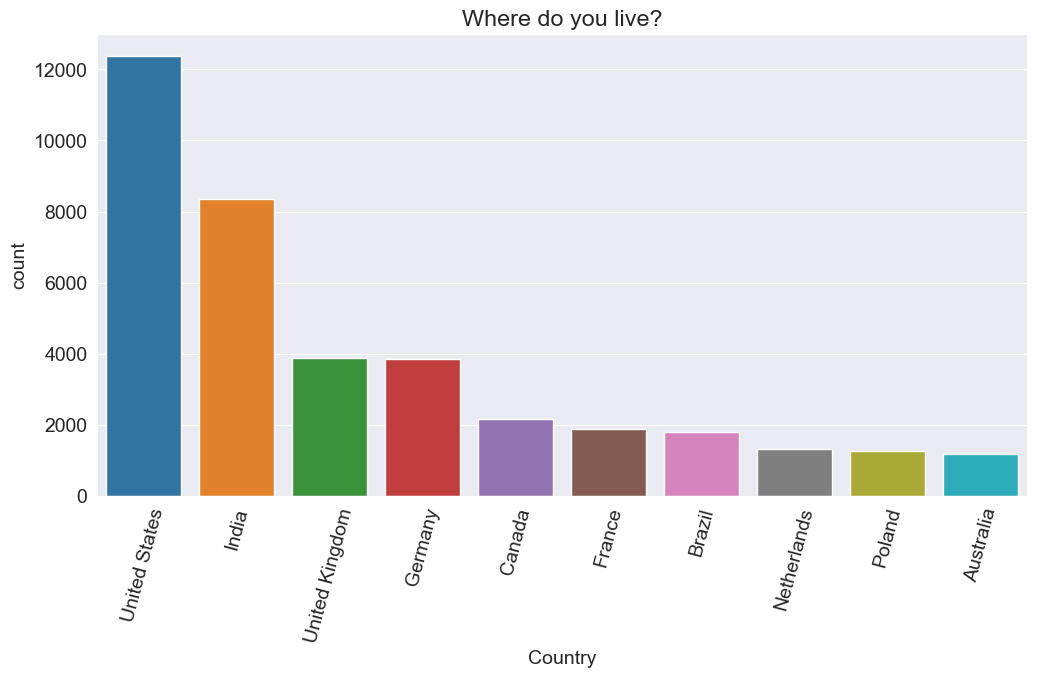

In [18]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
plt.title(schema_df.Country)
sns.barplot(x=top_countries.index, y=top_countries);

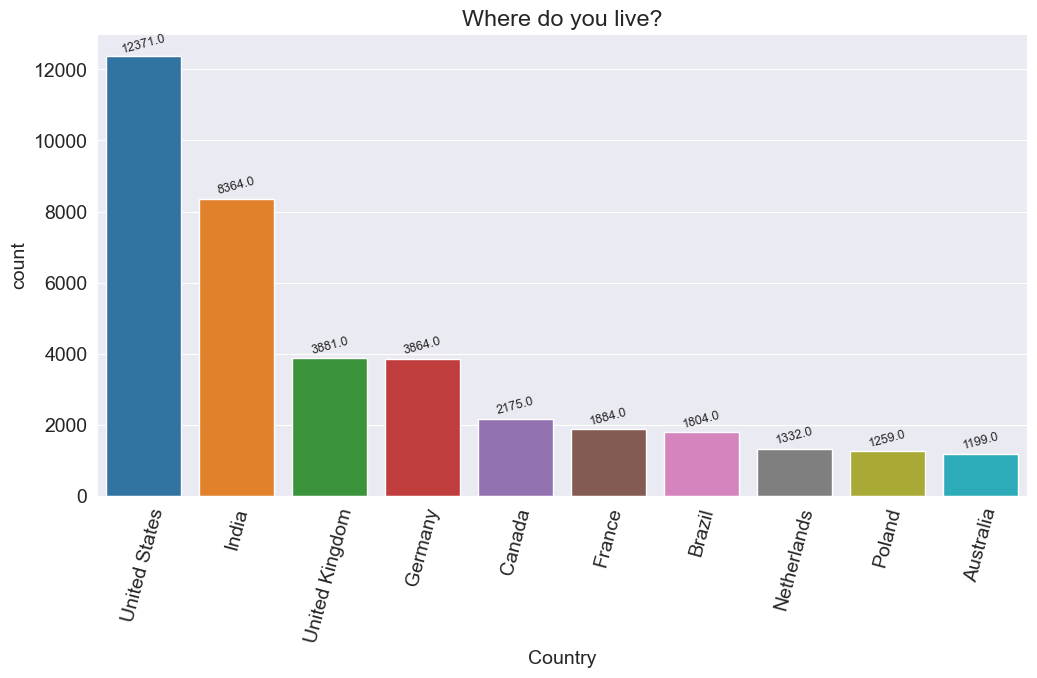

In [19]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
plt.title(schema_df.Country)
ax = sns.barplot(x=top_countries.index, y=top_countries)

#rotulos nas barras
for p in ax.patches:
    ax.annotate(format(p.get_height()),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9), textcoords = 'offset points',
                fontsize=9,
                rotation=15)

plt.show()

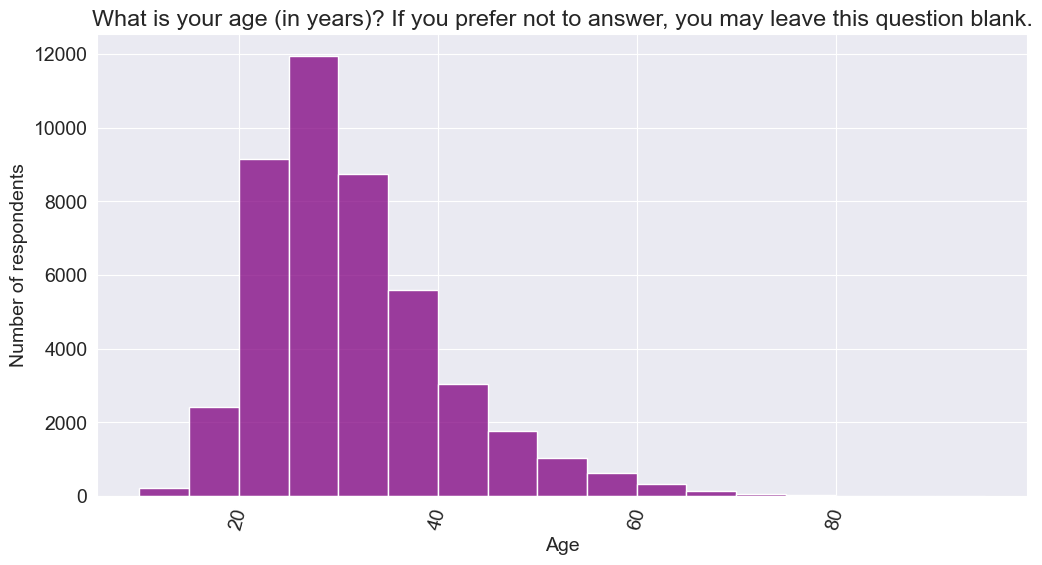

In [20]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
plt.title(schema_df.Age)
plt.xlabel('Age')
plt.ylabel('Number of respondents')
sns.histplot(data.Age, bins=np.arange(10,100,5), color='purple')


plt.show()

In [21]:
pl.histogram(data.Age, nbins=20, color=data.Gender).update_layout(bargap=0.2)


In [22]:
gender_count = data.Gender.value_counts(dropna=False)

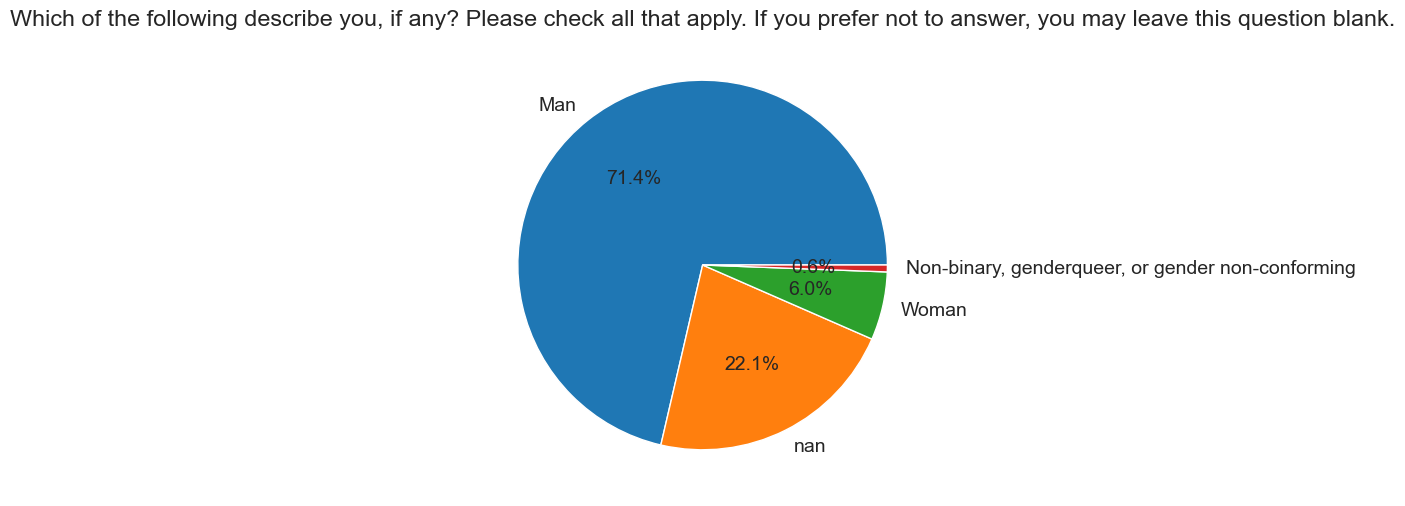

In [23]:
plt.figure(figsize=(12,6))
plt.title(schema_df.Gender)
plt.pie(gender_count, labels=gender_count.index, autopct='%1.1f%%');

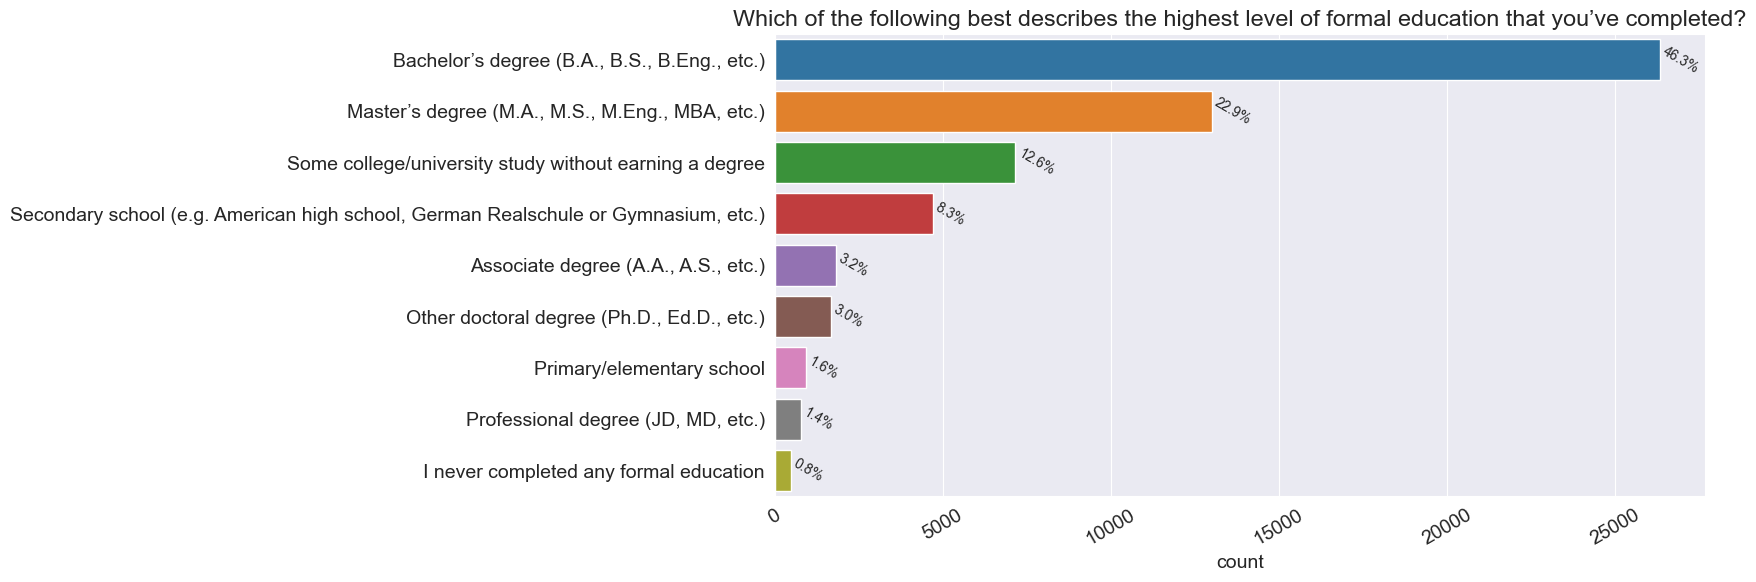

In [24]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=30)
plt.title(schema_df.EdLevel)
EdLevel_counts = data.EdLevel.value_counts().sort_values(ascending=False)
ay = sns.countplot(y=data.EdLevel, order=EdLevel_counts.index)
plt.ylabel(None);

EdLevel_percent = (EdLevel_counts/EdLevel_counts.sum())*100

for index, value in enumerate(EdLevel_counts):
    percentage = EdLevel_percent[index]
    ay.text(value, index, f'{percentage:.1f}%', va='center',fontsize = 10, rotation=330)

plt.show()

[]

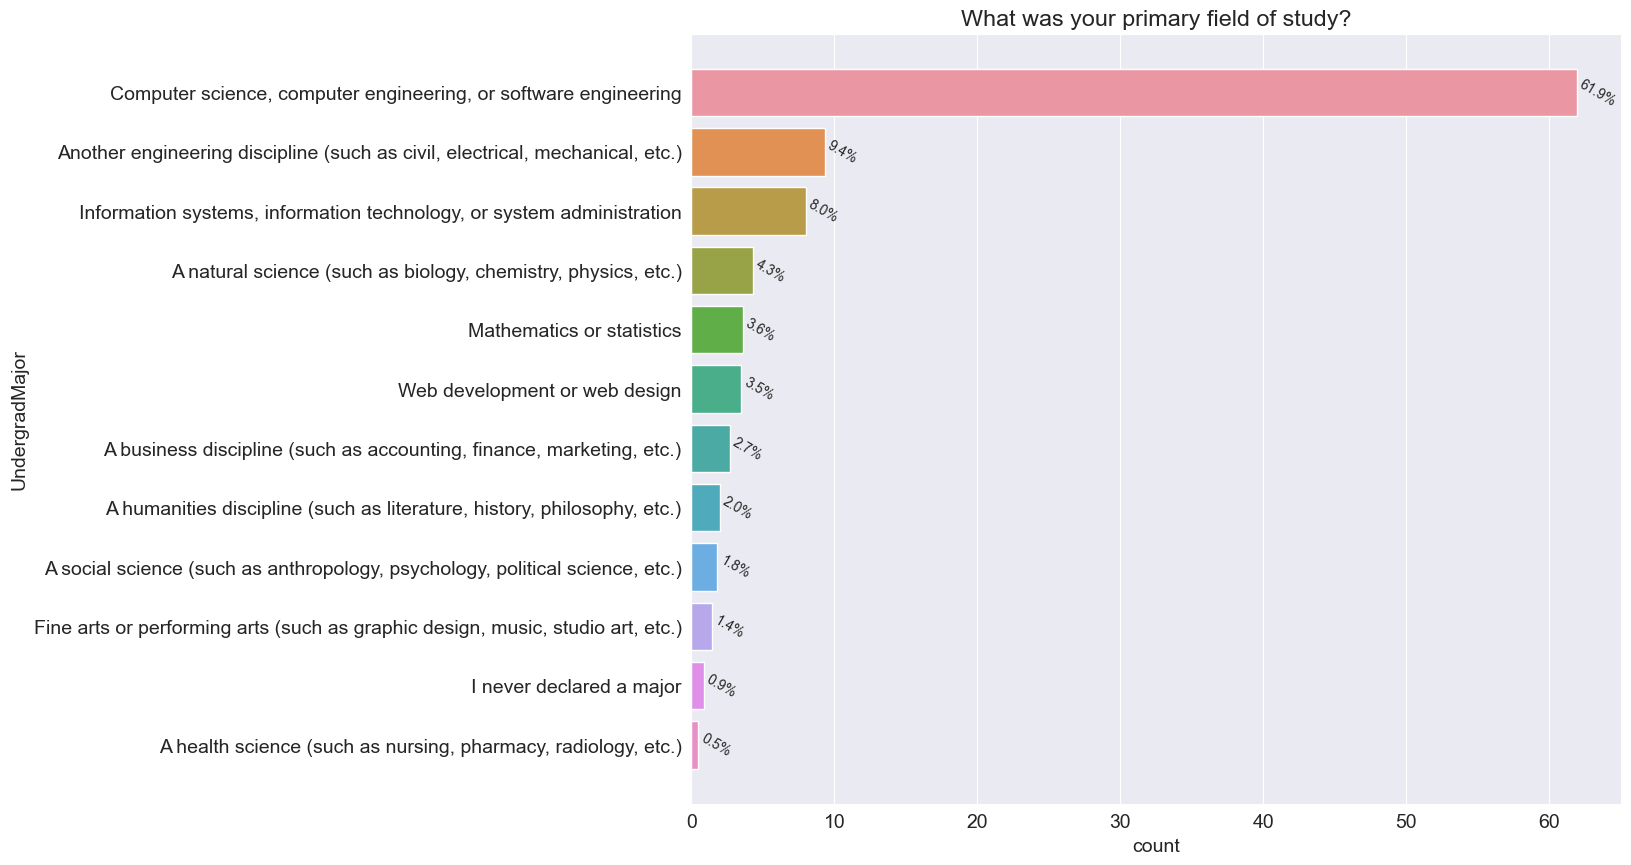

In [25]:
undergrad_pct = data.UndergradMajor.value_counts()*100/ data.UndergradMajor.count()

plt.figure(figsize=(12,10))
plt.title(schema_df.UndergradMajor)
plt.ylabel(None)
plt.xlabel('Percentage')
az = sns.barplot(x=undergrad_pct, y=undergrad_pct.index)

for index, value in enumerate(undergrad_pct):
    az.text(value, index, f'{value:.1f}%', va='center', fontsize = 10, rotation=330)

plt.plot()


[]

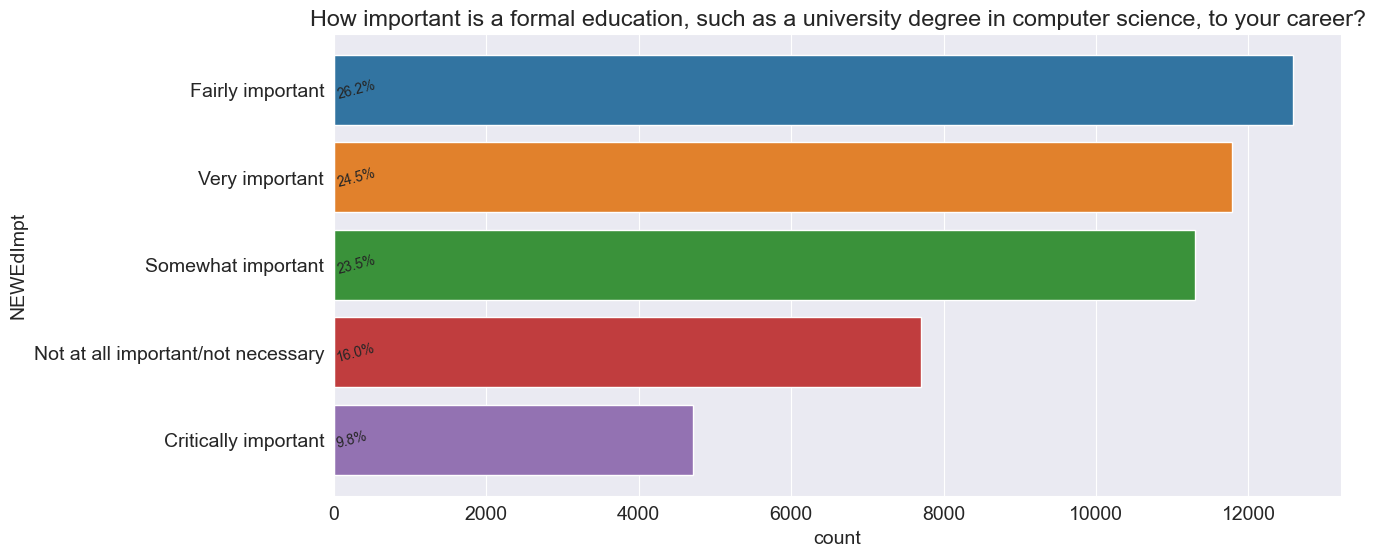

In [26]:
newe_count =  data.NEWEdImpt.value_counts()
newe_pct = (data.NEWEdImpt.value_counts()) * 100 / data.NEWEdImpt.count()

plt.figure(figsize=(13,6))
plt.title(schema_df.NEWEdImpt)
plt.ylabel(None)
plt.xlabel('percentage')
ab = sns.barplot(x=newe_count, y=newe_count.index);

for index, value in enumerate(newe_pct):
    ab.text(value, index, f'{value:.1f}%', va='center', fontsize=10, rotation=15)

plt.plot()

[]

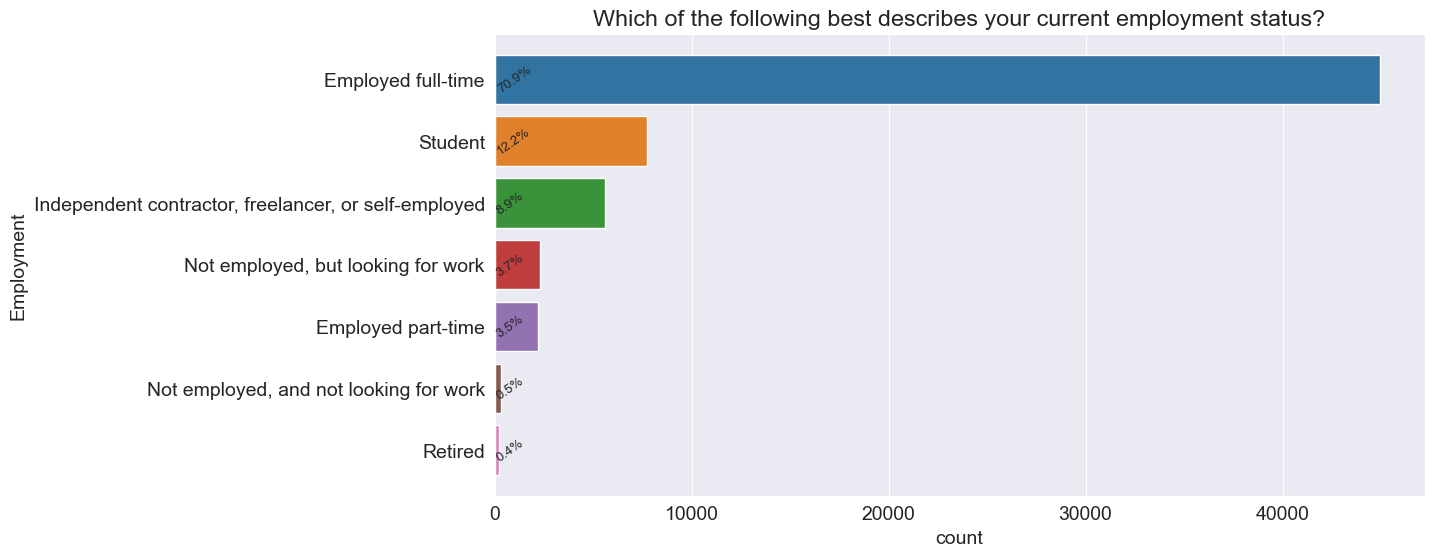

In [27]:
employ_count = data.Employment.value_counts()
employ_pct = (data.Employment.value_counts()) *100 / data.Employment.count()

plt.figure(figsize=(12,6))
plt.title(schema_df.Employment)
plt.ylabel(None)
plt.xlabel('Percentage')
ac = sns.barplot(x=employ_count, y=employ_count.index)

for index, value in enumerate(employ_pct):
    ac.text(value, index, f'{value:.1f}%', va='center', fontsize=9.5, rotation= 35)

plt.plot()

In [28]:
def bar_graph_values(col_series,a,b):

    col_series_count = col_series.value_counts()
    col_series_pct = (col_series.value_counts()) *100 / col_series.count()

    plt.figure(figsize=(a,b))
    #plt.title(schema_df.col_series)
    plt.ylabel(None)
    plt.xlabel('Percentage')
    ac = sns.barplot(x=col_series_count, y=col_series_count.index)

    for index, value in enumerate(col_series_pct):
        ac.text(value, index, f'{value:.1f}%', va='center', fontsize=9.5, rotation= 35)

    plt.plot()




In [29]:
data.DevType

0        Developer, desktop or enterprise applications;...
1                  Developer, full-stack;Developer, mobile
2                                                      NaN
3                                                      NaN
4                                                      NaN
                               ...                        
64456                                  Senior executive/VP
64457                                                  NaN
64458                                                  NaN
64459                                                  NaN
64460                                                  NaN
Name: DevType, Length: 64306, dtype: object

In [30]:
def split_multicolumn(col_series):
    result_df = col_series.to_frame()
    options = []
    for idx, value in col_series[col_series.notnull()].items():
        for option in value.split(';'):
            if not option in result_df.columns:
                options.append(option)
                result_df[option] = False
            result_df.at[idx, option] = True
    return result_df[options]

In [31]:
dev_type_df = split_multicolumn(data.DevType)
dev_type_df

,"Developer, desktop or enterprise applications","Developer, full-stack","Developer, mobile",Designer,"Developer, front-end","Developer, back-end","Developer, QA or test",DevOps specialist,"Developer, game or graphics",Database administrator,...,System administrator,Engineering manager,Product manager,Data or business analyst,Academic researcher,Data scientist or machine learning specialist,Scientist,Senior executive/VP,"Engineer, site reliability",Marketing or sales professional
0,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
64457,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64458,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64459,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


[]

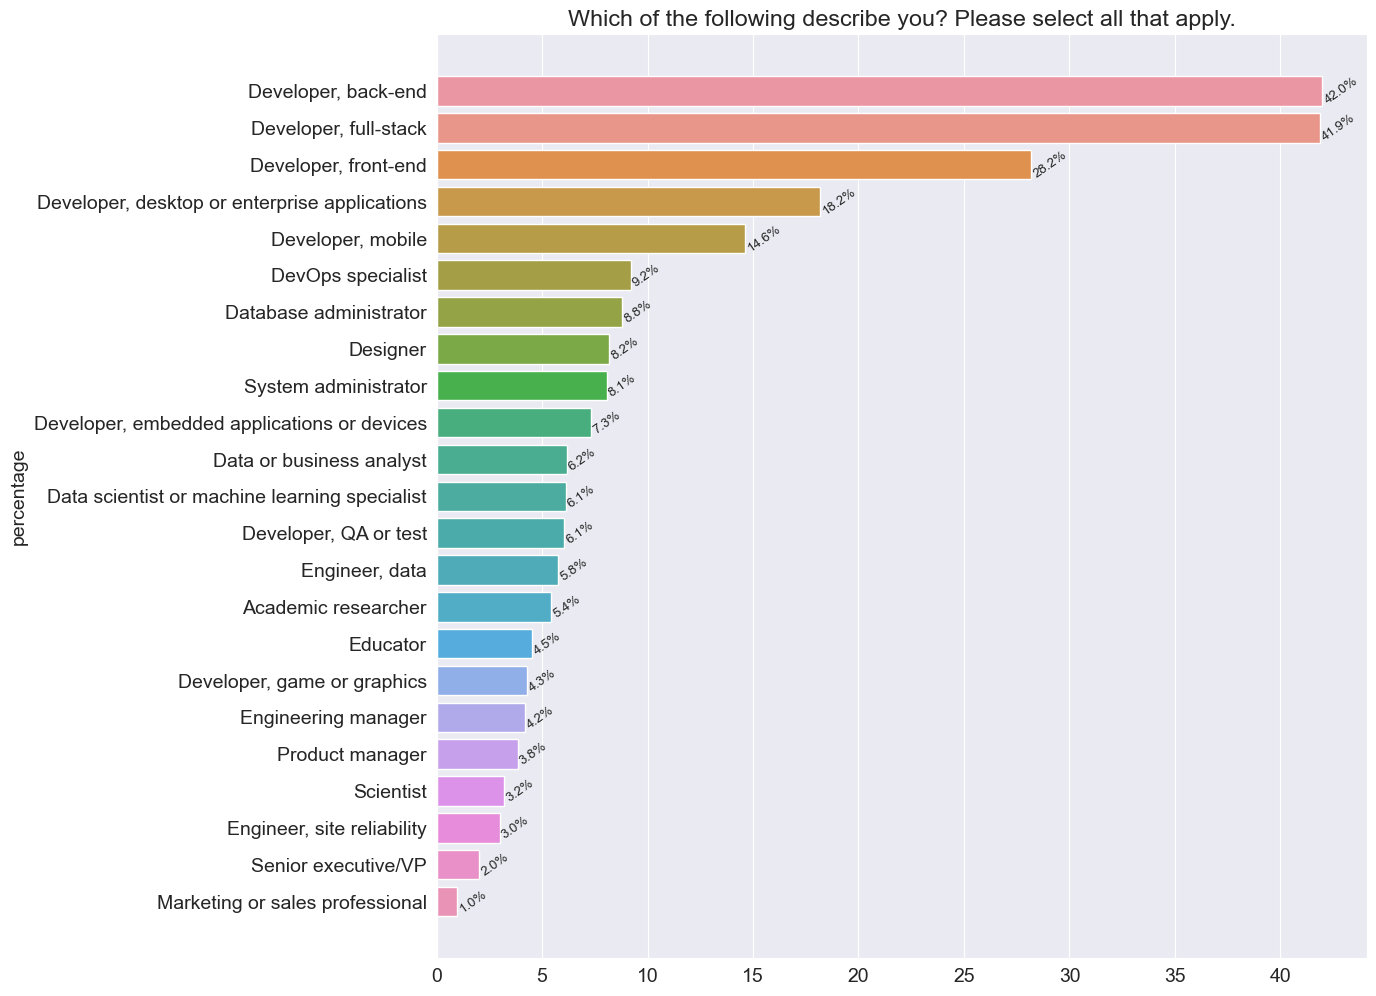

In [60]:
dev_sum_pct = (dev_type_df.sum()*100/dev_type_df.count()).sort_values(ascending=False)

plt.figure(figsize=(12,12))
plt.title(schema_df.DevType)
dx = sns.barplot(x=dev_sum_pct, y=dev_sum_pct.index)
plt.xlabel(None)
plt.ylabel('percentage')

for index, value in enumerate(dev_sum_pct):
    dx.text(value, index, f'{value:.1f}%', va='center', fontsize=9.5, rotation= 35)

plt.plot()

In [33]:
language = split_multicolumn(data.LanguageWorkedWith)
lang_tp_total = language.sum().sort_values(ascending=False)
lang_tp_total

JavaScript               38515
HTML/CSS                 35884
SQL                      31153
Python                   25080
Java                     22905
Bash/Shell/PowerShell    18803
C#                       17879
PHP                      14874
TypeScript               14444
C++                      13578
C                        12370
Go                        4989
Kotlin                    4429
Ruby                      4006
Assembly                  3503
VBA                       3469
Swift                     3361
R                         3257
Rust                      2893
Objective-C               2317
Dart                      2262
Scala                     2026
Perl                      1773
Haskell                   1197
Julia                      503
dtype: int64

[]

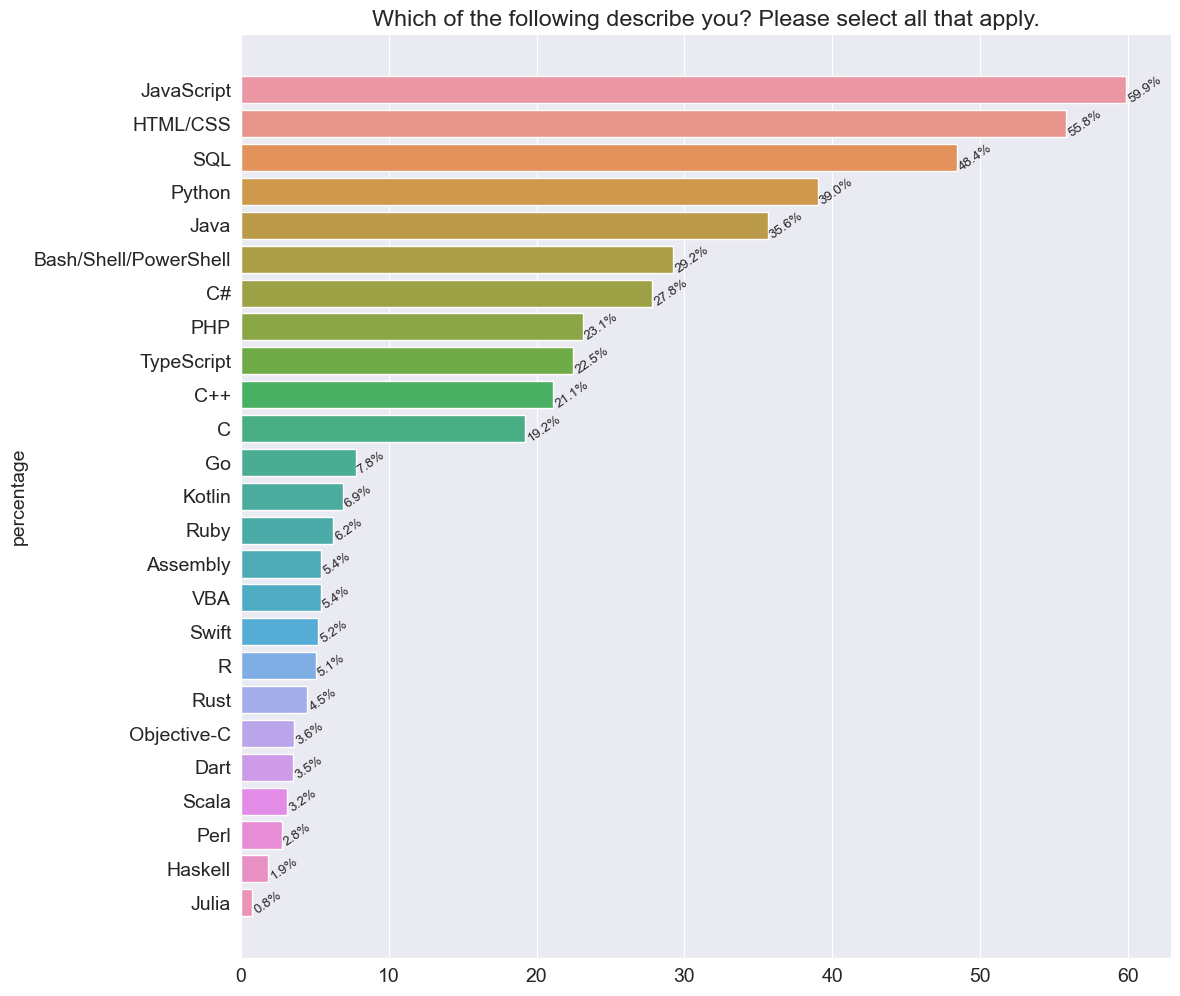

In [62]:
lang_sum_pct = (language.sum()*100/language.count()).sort_values(ascending=False)

plt.figure(figsize=(12,12))
plt.title(schema_df.DevType)
dx = sns.barplot(x=lang_sum_pct, y=lang_sum_pct.index)
plt.xlabel(None)
plt.ylabel('percentage')

for index, value in enumerate(lang_sum_pct):
    dx.text(value, index, f'{value:.1f}%', va='center', fontsize=9.5, rotation= 35)

plt.plot()